In [52]:
import pandas as pd
!pip install tqdm
from tqdm import tqdm

In [53]:
df = pd.read_csv('1003-zeya-svobodny.csv', sep=';')
print(df.head())
prediction = {}
NUMBER_OF_DAYS = 100
for i in range(NUMBER_OF_DAYS):
    prediction['day' + str(i)] = []
DAYS_TO_PREDICT = 4
prediction['to_predict' + str(DAYS_TO_PREDICT)] = []
day_couner = 0
counter = 0

    Timestamp  Value
0  2001-01-11     32
1  2001-02-11     39
2  2001-03-11     41
3  2001-04-11     47
4  2001-04-12     23


In [54]:
for i in tqdm(range(len(df['Value']))):
    if i + NUMBER_OF_DAYS + DAYS_TO_PREDICT>= len(df['Value']):
        break
    counter = 0
    for j in range(i, i + NUMBER_OF_DAYS):
        prediction['day' + str(counter)].append(df['Value'][j].astype(int))
        counter += 1
    prediction['to_predict' + str(DAYS_TO_PREDICT)].append(df['Value'][i + NUMBER_OF_DAYS + DAYS_TO_PREDICT].astype(int))
prediction = pd.DataFrame(prediction)
prediction.head()
         

 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 7046/7150 [00:02<00:00, 2518.56it/s]


,day0,day1,day2,day3,day4,day5,day6,day7,day8,day9,...,day91,day92,day93,day94,day95,day96,day97,day98,day99,to_predict4
0,32,39,41,47,23,28,-12,-18,7,28,...,75,81,82,98,104,89,80,82,96,78
1,39,41,47,23,28,-12,-18,7,28,31,...,81,82,98,104,89,80,82,96,98,87
2,41,47,23,28,-12,-18,7,28,31,-8,...,82,98,104,89,80,82,96,98,102,90
3,47,23,28,-12,-18,7,28,31,-8,32,...,98,104,89,80,82,96,98,102,102,92
4,23,28,-12,-18,7,28,31,-8,32,45,...,104,89,80,82,96,98,102,102,84,95


In [50]:
prediction.head()

,day0,day1,day2,day3,day4,day5,day6,day7,day8,day9,...,to_predict0,to_predict1,to_predict2,to_predict3,to_predict4,to_predict5,to_predict6,to_predict7,to_predict8,to_predict9
0,32,39,41,47,23,28,-12,-18,7,28,...,98,102,102,84,78,87,90,92,95,100
1,39,41,47,23,28,-12,-18,7,28,31,...,102,102,84,78,87,90,92,95,100,105
2,41,47,23,28,-12,-18,7,28,31,-8,...,102,84,78,87,90,92,95,100,105,104
3,47,23,28,-12,-18,7,28,31,-8,32,...,84,78,87,90,92,95,100,105,104,104
4,23,28,-12,-18,7,28,31,-8,32,45,...,78,87,90,92,95,100,105,104,104,106


In [55]:
from pycaret.regression import *
s = setup(prediction, target = 'to_predict4')

,Description,Value
0,session_id,7403
1,Target,to_predict4
2,Original Data,"(7046, 101)"
3,Missing Values,False
4,Numeric Features,100
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(4932, 100)"


In [56]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
knn,K Neighbors Regressor,23.8652,1526.5452,38.9273,0.8442,0.3435,0.2913,0.0450
et,Extra Trees Regressor,25.2559,1691.7460,41.0509,0.8272,0.3210,0.2563,0.6190
lightgbm,Light Gradient Boosting Machine,29.1273,2009.6282,44.7605,0.7942,0.3564,0.3226,0.2770
rf,Random Forest Regressor,29.1809,2218.4389,47.0221,0.7729,0.3514,0.2955,1.9470
gbr,Gradient Boosting Regressor,34.8488,2823.0859,53.0669,0.7110,0.4046,0.4068,0.8270
br,Bayesian Ridge,37.1871,3253.8229,56.9767,0.6673,0.4376,0.4186,0.0500
lasso,Lasso Regression,37.1941,3267.7553,57.0950,0.6657,0.4330,0.4187,0.1750
omp,Orthogonal Matching Pursuit,37.0431,3273.5038,57.1354,0.6656,0.4314,0.4156,0.0150
en,Elastic Net,37.2495,3276.1201,57.1680,0.6648,0.4338,0.4193,0.0610
lr,Linear Regression,37.3165,3287.2157,57.2645,0.6637,0.4347,0.4201,0.2680


In [57]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

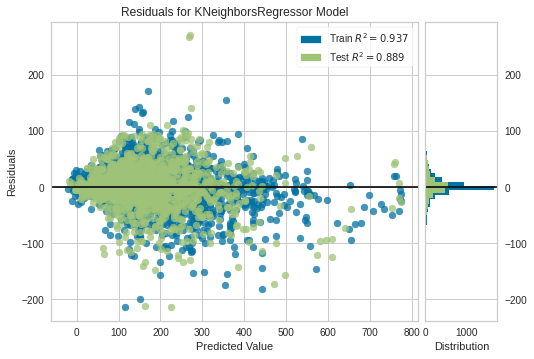

In [58]:
plot_model(best, plot = 'residuals')

In [59]:
predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,K Neighbors Regressor,19.9320,1052.0262,32.4350,0.8890,0.3350,0.2377


,day0,day1,day2,day3,day4,day5,day6,day7,day8,day9,...,day92,day93,day94,day95,day96,day97,day98,day99,to_predict4,Label
0,106.0,123.0,135.0,128.0,132.0,135.0,133.0,134.0,137.0,134.0,...,208.0,217.0,244.0,317.0,422.0,482.0,472.0,409.0,350,340.8
1,51.0,51.0,59.0,62.0,62.0,58.0,52.0,45.0,40.0,37.0,...,232.0,224.0,209.0,193.0,185.0,174.0,157.0,147.0,117,151.4
2,113.0,140.0,144.0,168.0,173.0,173.0,169.0,166.0,144.0,124.0,...,105.0,169.0,217.0,204.0,189.0,253.0,314.0,335.0,129,211.2
3,280.0,278.0,283.0,289.0,288.0,279.0,239.0,183.0,171.0,158.0,...,310.0,310.0,300.0,280.0,262.0,260.0,266.0,264.0,273,274.6
4,110.0,106.0,105.0,99.0,88.0,73.0,69.0,84.0,166.0,175.0,...,249.0,249.0,244.0,222.0,222.0,220.0,220.0,220.0,178,261.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2109,103.0,91.0,79.0,86.0,96.0,96.0,114.0,130.0,130.0,103.0,...,52.0,43.0,39.0,9.0,17.0,19.0,25.0,23.0,12,31.0
2110,126.0,122.0,120.0,116.0,107.0,109.0,116.0,114.0,151.0,176.0,...,22.0,42.0,42.0,29.0,33.0,19.0,19.0,31.0,20,46.4
2111,126.0,121.0,134.0,135.0,126.0,118.0,110.0,88.0,73.0,60.0,...,101.0,100.0,104.0,106.0,101.0,98.0,100.0,97.0,64,90.4
2112,-3.0,10.0,10.0,6.0,7.0,-10.0,-8.0,8.0,27.0,23.0,...,26.0,99.0,99.0,90.0,95.0,114.0,122.0,128.0,91,86.4


In [60]:
predictions = predict_model(best, data=prediction)
predictions.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,K Neighbors Regressor,16.0802,753.8089,27.4556,0.9227,0.2901,0.1925


,day0,day1,day2,day3,day4,day5,day6,day7,day8,day9,...,day92,day93,day94,day95,day96,day97,day98,day99,to_predict4,Label
0,32,39,41,47,23,28,-12,-18,7,28,...,81,82,98,104,89,80,82,96,78,91.4
1,39,41,47,23,28,-12,-18,7,28,31,...,82,98,104,89,80,82,96,98,87,91.4
2,41,47,23,28,-12,-18,7,28,31,-8,...,98,104,89,80,82,96,98,102,90,94.2
3,47,23,28,-12,-18,7,28,31,-8,32,...,104,89,80,82,96,98,102,102,92,97.4
4,23,28,-12,-18,7,28,31,-8,32,45,...,89,80,82,96,98,102,102,84,95,97.2


In [61]:
save_model(best, 'my_best_pipeline_for_10_days')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[],
                                       target='to_predict4', time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
                 ('fix_perfect', Remove_100(target='to_predict4')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
        